In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader

from matplotlib import pyplot as plt

In [2]:
%matplotlib inline

In [3]:
transform = transforms.Compose([
    transforms.ToTensor(), #input it (0,255) totensor convert it to (0,1)
    transforms.Normalize((0.5,),(0.5,)),   #(0,1) to (-1,1)
])

train_dataset = datasets.MNIST(
root='data',
train=True,
transform=transform,
download=True
)

test_dataset = datasets.MNIST(
root='data',
train=False,
transform=transform,
download=True
)

In [4]:
len(train_dataset)

60000

In [5]:
len(test_dataset)

10000

In [6]:
train_loader=DataLoader(train_dataset,batch_size=64, shuffle=True)
test_loader=DataLoader(test_dataset,batch_size=64, shuffle=True)

data_iter = iter(train_loader)
images, lables = next(data_iter)

In [7]:
images.shape

torch.Size([64, 1, 28, 28])

In [8]:
images[0].squeeze().shape

torch.Size([28, 28])

In [11]:
class DigitsClassifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.network = nn.Sequential(
      nn.Flatten(),
      nn.Linear(784,128),
      nn.ReLU(),
      nn.Linear(128,64),
      nn.ReLU(),
      nn.Linear(64,10) 
    )
  def forward(self,x):
    return self.network(x)

In [12]:
model = DigitsClassifier()
optimiser = optim.Adam(model.parameters(),lr=0.001)
criterion = nn.CrossEntropyLoss()

In [13]:
epochs = 5

for epoch in range(epochs):
  running_loss = 0.0
  for images, lables in train_loader:

    outputs = model(images)
    loss = criterion(outputs,lables)

    running_loss += loss.item()
    optimiser.zero_grad()
    loss.backward()

    optimiser.step()
  print(f'Epoch: {epoch+1}, Loss: {loss.item()}')

Epoch: 1, Loss: 0.3412761688232422
Epoch: 2, Loss: 0.056326523423194885
Epoch: 3, Loss: 0.05554106831550598
Epoch: 4, Loss: 0.04046548157930374
Epoch: 5, Loss: 0.057787250727415085


In [14]:
model.eval()
with torch.no_grad():
  for images, lables in test_loader:
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    print(predicted)
    print(lables)
    print((predicted == lables).sum().item())
    break


tensor([0, 5, 5, 8, 8, 6, 2, 3, 6, 5, 5, 6, 6, 9, 9, 6, 9, 7, 7, 1, 4, 8, 7, 0,
        2, 4, 1, 0, 9, 9, 1, 3, 7, 3, 8, 6, 3, 9, 8, 0, 1, 1, 0, 9, 3, 3, 8, 0,
        4, 7, 5, 1, 6, 5, 9, 9, 4, 4, 3, 1, 3, 7, 0, 1])
tensor([0, 5, 5, 8, 8, 6, 2, 3, 6, 5, 5, 6, 6, 9, 9, 6, 9, 7, 7, 1, 4, 8, 7, 0,
        2, 4, 1, 0, 9, 9, 1, 3, 7, 3, 8, 6, 3, 9, 8, 0, 1, 1, 0, 9, 3, 3, 8, 0,
        4, 7, 5, 1, 6, 5, 9, 9, 4, 4, 3, 1, 3, 7, 0, 1])
64


In [15]:
model.eval()

total =0
correct = 0

with torch.no_grad():
  for images, lables in test_loader:
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
  
    correct +=(predicted == lables).sum().item()
    total +=lables.size(0)

print(f"Accuracy on the test set: {100 * correct/total:.2f}%")

Accuracy on the test set: 96.47%


In [16]:
total, correct

(10000, 9647)

In [17]:
model.eval()

all_predictions =[]
all_labels=[]

with torch.no_grad():
  for images, lables in test_loader:
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    
    all_labels.extend(lables.numpy())
    all_predictions.extend(predicted.numpy())

In [18]:
len(all_predictions)

10000

In [19]:
len(all_labels)

10000

In [20]:
from sklearn.metrics import classification_report

report = classification_report(all_labels,all_predictions)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       980
           1       0.98      0.99      0.98      1135
           2       0.97      0.97      0.97      1032
           3       0.98      0.96      0.97      1010
           4       0.97      0.96      0.96       982
           5       0.94      0.97      0.95       892
           6       0.93      0.99      0.96       958
           7       0.98      0.94      0.96      1028
           8       0.95      0.96      0.95       974
           9       0.97      0.93      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.97      0.96      0.96     10000



In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(all_labels,all_predictions)
cm

array([[ 959,    0,    0,    0,    2,    2,   14,    1,    2,    0],
       [   0, 1119,    2,    1,    0,    2,    5,    1,    5,    0],
       [   6,    1,  997,    2,    1,    0,   12,    5,    8,    0],
       [   1,    0,    7,  968,    0,   18,    0,    5,    8,    3],
       [   4,    0,    1,    0,  946,    4,   13,    1,    5,    8],
       [   3,    1,    0,    3,    1,  867,   12,    0,    3,    2],
       [   1,    2,    0,    0,    1,    5,  947,    0,    2,    0],
       [   3,   10,   16,    2,    0,    3,    3,  971,    7,   13],
       [   5,    0,    1,    4,    3,   10,   13,    3,  933,    2],
       [   4,    5,    0,    5,   26,   15,    1,    4,    9,  940]],
      dtype=int64)

Text(50.722222222222214, 0.5, 'true lables')

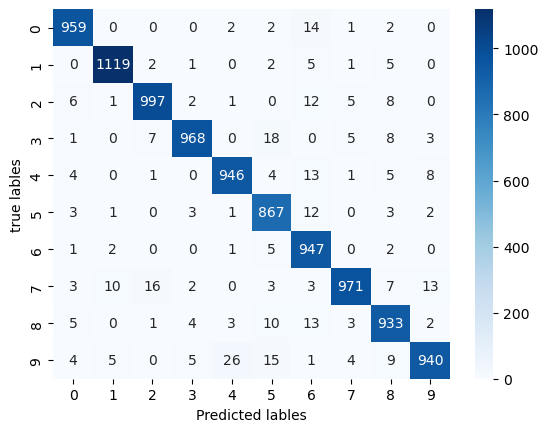

In [23]:
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel("Predicted lables")
plt.ylabel("true lables")